In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from datetime import datetime
import seaborn as sns

In [2]:
video_metadata = pd.read_feather('video_metadata.feather')
video_metadata = video_metadata[:1000000] # keep only a slice for testing
video_metadata.head()

,categories,channel_id,dislike_count,duration,like_count,tags,upload_date,view_count,video_id
0,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,11423.0,1762,29891.0,"lego city police for kids,lego polizi,lego mov...",2017-12-08 00:00:00,23152662.0,mp9gt45aHxY
1,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,1561.0,1146,6118.0,"lego dinosaurs,lego jurassic world,lego dinosa...",2017-12-07 00:00:00,4028426.0,hn2zYwqSINY
2,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,206.0,1706,2235.0,"lego marvel super heroes 2,lego super heroes 2...",2017-11-18 00:00:00,585746.0,UTZLSHaE4Sw
3,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,799.0,2146,2501.0,"lego dinosaurs,lego jurassic world,lego t-rex,...",2017-02-21 00:00:00,1547805.0,SWZG-ba1qDk
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2548.0,2196,8780.0,"lego batman movie,the batman movie,new batman ...",2017-02-13 00:00:00,6674760.0,3vQK78eUg2A


In [3]:
video_metadata['upload_date'] = pd.to_datetime(video_metadata['upload_date'])

In [4]:
video_metadata.head()

,categories,channel_id,dislike_count,duration,like_count,tags,upload_date,view_count,video_id
0,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,11423.0,1762,29891.0,"lego city police for kids,lego polizi,lego mov...",2017-12-08,23152662.0,mp9gt45aHxY
1,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,1561.0,1146,6118.0,"lego dinosaurs,lego jurassic world,lego dinosa...",2017-12-07,4028426.0,hn2zYwqSINY
2,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,206.0,1706,2235.0,"lego marvel super heroes 2,lego super heroes 2...",2017-11-18,585746.0,UTZLSHaE4Sw
3,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,799.0,2146,2501.0,"lego dinosaurs,lego jurassic world,lego t-rex,...",2017-02-21,1547805.0,SWZG-ba1qDk
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2548.0,2196,8780.0,"lego batman movie,the batman movie,new batman ...",2017-02-13,6674760.0,3vQK78eUg2A


### Data filtering

Explain: artistic video category do not exist => so we made ours
=> explain how with dictionnaries

In [5]:
# Formatting the tags column in order to do exact word matching
df_videos = video_metadata
df_videos['tags'] = df_videos['tags'].apply(str.lower)
df_videos['tags'] = df_videos['tags'].apply(str.replace, args=(';',' ',))
df_videos['tags'] = df_videos['tags'].apply(str.replace, args=(',',' ',))
df_videos['tags'] = df_videos['tags'].apply(str.replace, args=('(',' ',))
df_videos['tags'] = df_videos['tags'].apply(str.replace, args=(')',' ',))
df_videos['tags'] = df_videos['tags'].apply(str.replace, args=('&',' ',))
df_videos['tags'] = df_videos['tags'].apply(str.replace, args=('|',' ',))
df_videos['tags'] = df_videos['tags'].apply(str.split)

In [6]:
df_videos.head()

,categories,channel_id,dislike_count,duration,like_count,tags,upload_date,view_count,video_id
0,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,11423.0,1762,29891.0,"[lego, city, police, for, kids, lego, polizi, ...",2017-12-08,23152662.0,mp9gt45aHxY
1,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,1561.0,1146,6118.0,"[lego, dinosaurs, lego, jurassic, world, lego,...",2017-12-07,4028426.0,hn2zYwqSINY
2,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,206.0,1706,2235.0,"[lego, marvel, super, heroes, 2, lego, super, ...",2017-11-18,585746.0,UTZLSHaE4Sw
3,Gaming,UCzWrhkg9eK5I8Bm3HfV-unA,799.0,2146,2501.0,"[lego, dinosaurs, lego, jurassic, world, lego,...",2017-02-21,1547805.0,SWZG-ba1qDk
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,2548.0,2196,8780.0,"[lego, batman, movie, the, batman, movie, new,...",2017-02-13,6674760.0,3vQK78eUg2A


Some helper functions

In [7]:
def return_word_in_list(tags, word_list):
    
    # Make sets from the list of words
    x = set(tags)
    y = set(word_list)
    
    # Use intersection function of set type to quickly find which word are in both lists/sets
    z = x.intersection(y)

    return z

In [8]:
def check_tags_in_list(tags, word_list):
    word_present = 0
    
    # Make sets from the list of words
    x = set(tags)
    y = set(word_list)
    
    # Use intersection function of set type to quickly find which word are in both lists/sets
    z = x.intersection(y)
    
    # If the intersection is larger than 0, then there is at least a common word between both sets 
    if len(z) > 0:
        word_present = 1
    return word_present

#### Artistic videos

In [9]:
# Art words
words_path_visual = "dictionaries/visual_arts.txt"
words_path_performing = "dictionaries/performing_art.txt"
words_path_literary = "dictionaries/literary_art.txt"

visual_arts = pd.read_csv(words_path_visual)
literary_arts = pd.read_csv(words_path_literary)
performing_arts = pd.read_csv(words_path_performing)

visual_words = visual_arts.values
literary_words = literary_arts.values
performing_words = performing_arts.values

visual_words = visual_words.flatten()
literary_words = literary_words.flatten()
performing_words = performing_words.flatten()


# maybe only print samples of each
print(visual_words[:4])
print(literary_words[:4])
print(performing_words[:4])

['ceramics' 'draw' 'draw in' 'drawing']
['literatures' 'writing' 'text' 'texts']
['theatres' 'audience' 'speech' 'spectacle']


In [10]:
df_videos['visual_art'] = df_videos['tags'].apply(lambda x : check_tags_in_list(x, visual_words))
df_videos['literary_art'] = df_videos['tags'].apply(lambda x : check_tags_in_list(x, literary_words))
df_videos['performing_art'] = df_videos['tags'].apply(lambda x : check_tags_in_list(x, performing_words))
df_videos["art"] = 0
df_videos["art"].loc[(df_videos.visual_art == 1) | (df_videos.literary_art == 1) | (df_videos.performing_art == 1)] = 1

C:\Users\gasto\AppData\Local\Temp\ipykernel_1100\1513569392.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_videos["art"].loc[(df_videos.visual_art == 1) | (df_videos.literary_art == 1) | (df_videos.performing_art == 1)] = 1


In [11]:
df_videos['visual_art_word'] = df_videos['tags'].apply(lambda x : return_word_in_list(x, visual_words))
df_videos['literary_art_word'] = df_videos['tags'].apply(lambda x : return_word_in_list(x, literary_words))
df_videos['performing_art_word'] = df_videos['tags'].apply(lambda x : return_word_in_list(x, performing_words))

In [12]:
df_art = df_videos.loc[df_videos.art == 1]

In [65]:
df_art.reset_index(inplace=True, drop=True)

In [14]:
df_art['month_year'] = [datetime(year, month, 1) for year, month in zip(df_art.upload_date.dt.year, df_art.upload_date.dt.month)]

C:\Users\gasto\AppData\Local\Temp\ipykernel_1100\3959402358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_art['month_year'] = [datetime(year, month, 1) for year, month in zip(df_art.upload_date.dt.year, df_art.upload_date.dt.month)]


In [15]:
month_years = df_art['month_year'].unique()

In [60]:
percentages_visual = []
percentages_performing = []
percentages_literary = []

for month_year in month_years:
    total_art_videos = ((df_art['month_year'] == month_year) & (df_art['visual_art'] == 1)).sum() \
    + ((df_art['month_year'] == month_year) & (df_art['performing_art'] == 1)).sum() \
    + ((df_art['month_year'] == month_year) & (df_art['literary_art'] == 1)).sum()

    percentages_visual.append(((df_art['month_year'] == month_year) & (df_art['visual_art'] == 1)).sum()/total_art_videos)
    percentages_performing.append(((df_art['month_year'] == month_year) & (df_art['performing_art'] == 1)).sum()/total_art_videos)
    percentages_literary.append(((df_art['month_year'] == month_year) & (df_art['literary_art'] == 1)).sum()/total_art_videos)


In [61]:
df_art_time = pd.DataFrame({
    'month_year': month_years,
    'percentage_visual': percentages_visual,
    'percentage_performing': percentages_performing,
    'percentage_literary': percentages_literary,
})

In [62]:
df_art_time.head()

,month_year,percentage_visual,percentage_performing,percentage_literary
0,2014-12-01,0.312595,0.279211,0.408194
1,2014-10-01,0.290241,0.357414,0.352345
2,2014-07-01,0.410872,0.222503,0.366625
3,2019-09-01,0.283234,0.391369,0.325397
4,2019-06-01,0.271858,0.438069,0.290073


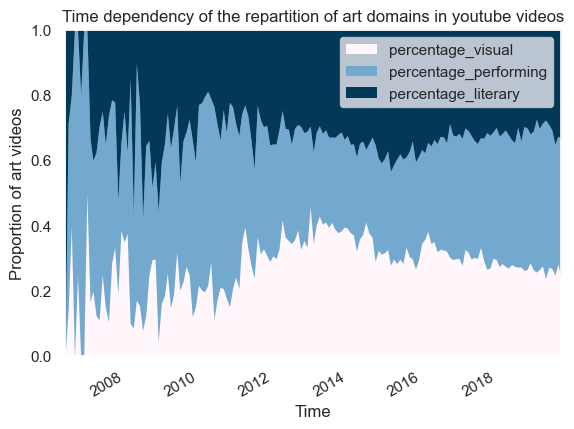

In [64]:
df_art_time.plot.area('month_year', ['percentage_visual', 'percentage_performing', 'percentage_literary'], colormap='PuBu', lw=0)
plt.title('Time dependency of the repartition of art domains in youtube videos')
plt.ylim([0, 1])
plt.ylabel('Proportion of art videos')
plt.xlabel('Time')
plt.margins(0)
plt.show()